In [1]:
import pandas as pd
import pickle

In [31]:
%%time
folder = 'C:/Users/Tom Work/PycharmProjects/nyu-twipsy/tweets_by_week'
tweets = pd.read_csv(folder + '/tweets_1.csv', encoding='utf8').dropna()

Wall time: 1.23 s


In [112]:
tweets2 = pd.read_csv(folder + '/tweets_2.csv', encoding='utf8').dropna()
tweets3 = pd.read_csv(folder + '/tweets_3.csv', encoding='utf8').dropna()
tweets4 = pd.read_csv(folder + '/tweets_4.csv', encoding='utf8').dropna()
tweets5 = pd.read_csv(folder + '/tweets_5.csv', encoding='utf8').dropna()

In [4]:
folder = 'C:/Users/Tom Work/PycharmProjects/nyu-twipsy/tweets_split'
all_tweets = pd.read_csv(folder + '/tweets_0.csv', encoding='utf8').dropna()

In [45]:
clf_alc = pickle.load(open('clf_alc_UPDATED.p', 'rb'))
clf_fpa = pickle.load(open('clf_fpa_UPDATED.p', 'rb'))
clf_fpl = pickle.load(open('clf_fpl_UPDATED.p', 'rb'))

In [46]:
clf_alc.steps[0][1].transformer_list[0][1].steps[1][1].get_params()

{'analyzer': 'char',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 71233,
 'min_df': 1,
 'ngram_range': (2, 5),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
clf_alc = pickle.load(open('clf_alc_svc_UPDATED.p', 'rb'))

In [31]:
%%time
labeled= clf(all_tweets)
pickle.dump(labeled, open('June_labeled_all_alc_svc.p', 'wb'))

Wall time: 7h 33min 31s


In [37]:
pickle.dump(labeled, open('June_labeled_all_alc_svc.p', 'wb'))

In [32]:
df = labeled
df.shape

(805336, 12)

In [6]:
from classification.prediction import PredictionTransformer

In [7]:
clf = PredictionTransformer(clf_alc, clf_fpa, clf_fpl)

In [58]:
clf.thres = 0.5

In [8]:
%%time
df = clf(all_tweets)

Wall time: 2min 46s


In [9]:
df.head()

,text,id,created_at,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past
0,dude I just love being lied to,605161850804805632,Mon Jun 01 00:00:03 +0000 2015,0.378457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chandler Regional Medical Center #Nursing #Job...,605161880156434433,Mon Jun 01 00:00:10 +0000 2015,0.171505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,@KarolynLG siiiiiiiii jajajajaja 😁👍,605161909147607040,Mon Jun 01 00:00:17 +0000 2015,0.334220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Seeing Emily is necessary,605161911970361344,Mon Jun 01 00:00:17 +0000 2015,0.337153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"@kate_berenyi aloha, it's got Bradley cooper 😍",605161912565936129,Mon Jun 01 00:00:17 +0000 2015,0.269201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = pickle.load(open('June_labeled_all_alc_svc.p', 'rb'))

In [16]:
np.mean(df.predict_fpa> 0.75)

0.0010827778715964517

In [40]:
df.shape

(806002, 11)

In [36]:
df.index = pd.to_datetime(df.created_at)
df.index

DatetimeIndex(['2015-06-01 00:00:03', '2015-06-01 00:00:10',
               '2015-06-01 00:00:17', '2015-06-01 00:00:17',
               '2015-06-01 00:00:17', '2015-06-01 00:00:19',
               '2015-06-01 00:00:19', '2015-06-01 00:00:24',
               '2015-06-01 00:00:27', '2015-06-01 00:00:27',
               ...
               '2015-06-29 23:59:48', '2015-06-29 23:59:48',
               '2015-06-29 23:59:52', '2015-06-29 23:59:53',
               '2015-06-29 23:59:54', '2015-06-29 23:59:56',
               '2015-06-29 23:59:56', '2015-06-29 23:59:58',
               '2015-06-29 23:59:58', '2015-06-29 23:59:58'],
              dtype='datetime64[ns]', name='created_at', length=805336, freq=None)

In [25]:
df[df.predict_alc>0.7].sample(10)

,text,id,created_at,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past,first_person_alcohol,casual,looking,reflecting
created_at,,,,,,,,,,,,,,,,
2015-06-12 00:27:31,Got to hear Jacco Gardner sound check for a se...,609155031040946176,Fri Jun 12 00:27:31 +0000 2015,0.778431,0.595261,0.764692,0.978364,0.012947,0.008689,0.582382,0.007707,0.005172,0,True,False,False
2015-06-10 06:20:24,#BecauseOfJeremiahAkABluJ http://t.co/tBmZBO38k8,608519061073481729,Wed Jun 10 06:20:24 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-25 01:24:29,@Michael5SOS http://t.co/tl1uI46ywo,613880409009561600,Thu Jun 25 01:24:29 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-27 23:59:11,👌 http://t.co/quYmqPeCvi,614946104820539392,Sat Jun 27 23:59:11 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-08 17:57:33,http://t.co/PqZlcqlmUw,607969728464699392,Mon Jun 08 17:57:33 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-11 07:41:08,@maIum666 http://t.co/WOGkXFJ1wQ,608901767586152448,Thu Jun 11 07:41:08 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-23 01:44:47,🌿✨ http://t.co/ixM3QK9XVh,613160741776953344,Tue Jun 23 01:44:47 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-20 03:25:44,@krazylegz420 http://t.co/114xnXwLVK,612098983847051264,Sat Jun 20 03:25:44 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False
2015-06-24 05:06:30,http://t.co/XrX3mC5eAl,613573894536957953,Wed Jun 24 05:06:30 +0000 2015,0.720189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,False,False,False


In [11]:
import matplotlib.pylab as plt
import matplotlib as m

%matplotlib inline

import pandas as pd
import numpy as np

In [26]:
plt.rcParams["figure.figsize"] = (14, 5)
plt.rcParams["figure.dpi"] = 600
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.size"] = 14
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
plt.rcParams.update({'figure.autolayout': True})
# plt.rcParams

In [27]:
def centered_95int(data):
    return 1.96 * (data.std() / np.sqrt(len(data)))

In [39]:
p = 0.75
of_interest = df.predict_fpa > p

df["first_person_alcohol"] = 0
df["first_person_alcohol"][of_interest] = 1

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
fp_cols = [ 'predict_present', 'predict_future', 'predict_past']
new_fp_cols = ["casual", "looking", "reflecting"]
for new_name, old_name in zip(new_fp_cols, fp_cols):
    df[new_name] = df[old_name] >0.6
# df['casual'] = (df.predict_fpa > 0.5) & (df.predict_present > df.predict_future) & (df.predict_present > df.predict_past)
# df['casual'].head()
# df['looking'] = (df.predict_fpa > 0.5) & (df.predict_present < df.predict_future) & (df.predict_future > df.predict_past)
# df['reflecting'] = (df.predict_fpa > 0.5) & (df.predict_past > df.predict_future) & (df.predict_present < df.predict_past)

In [23]:
%%time
df.index = pd.to_datetime(df.created_at)

Wall time: 7min 16s


     reflecting              casual             looking          
            err      mean       err      mean       err      mean
0 0    0.000429  0.000379  0.000857  0.001516  0.000606  0.000758
  1    0.000000  0.000000  0.000762  0.001290  0.000325  0.000234
  2    0.000310  0.000274  0.000644  0.001186  0.000438  0.000547
  3    0.000159  0.000081  0.000636  0.001298  0.000318  0.000325
  4    0.000206  0.000105  0.000619  0.000948  0.000357  0.000316
  5    0.000243  0.000124  0.000767  0.001237  0.000485  0.000495
  6    0.000328  0.000167  0.000655  0.000669  0.000463  0.000334
  7    0.000465  0.000237  0.000930  0.000949  0.000658  0.000474
  8    0.000707  0.000361  0.000999  0.000721  0.001224  0.001082
  9    0.000000  0.000000  0.002593  0.002962  0.000000  0.000000
  10   0.000000  0.000000  0.000000  0.000000  0.001412  0.000720
  11   0.001009  0.000515  0.001009  0.000515  0.000000  0.000000
  12   0.001037  0.000748  0.001270  0.001122  0.001270  0.001122
  13   0.0

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


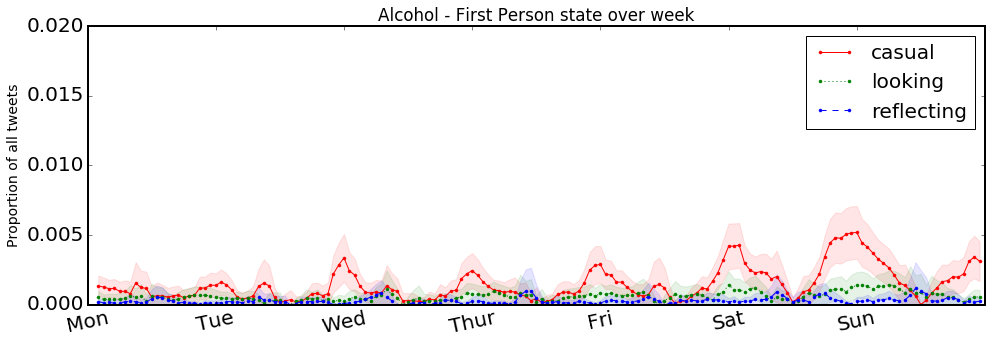

In [41]:
temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
    {
        _:{"mean":"mean", "err":centered_95int} for _ in new_fp_cols
    }
)
print (temp)
means = pd.rolling_mean(temp[[1,3,5]], 3)
stds = pd.rolling_mean(temp[[0,2,4]], 3)

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]


fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(range(24*7), means.casual, "r.-", label="casual")
ax.fill_between(
    x=range(24*7),
    y1=means.casual - stds.casual,
    y2=means.casual + stds.casual,
    color='r', alpha=.1
)


ax.plot(range(24*7), means.looking, "g.:", label="looking")
ax.fill_between(
    x=range(24*7),
    y1=means.looking - stds.looking,
    y2=means.looking + stds.looking,
    color="g", alpha=.1
)



ax.plot(range(24*7), means.reflecting, "b.--", label="reflecting")
ax.fill_between(
    x=range(24*7),
    y1=means.reflecting - stds.reflecting,
    y2=means.reflecting + stds.reflecting,
    color="b", alpha=.1
)


ax.set_xlim([0, 24*7])
ax.set_ylim([0, .02])
ax.set_xticks(range(0, 24*7, 24))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
ax.set_title("Alcohol - First Person state over week")
ax.set_ylabel("Proportion of all tweets")
ax.legend(loc="best")
# plt.savefig("plt_levels_weekhour_test_alc.pdf")

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=1).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


  reflecting              casual             looking          
         err      mean       err      mean       err      mean
0   0.000067  0.000167  0.000165  0.001016  0.000115  0.000494
1   0.000082  0.000191  0.000186  0.000984  0.000113  0.000365
2   0.000102  0.000265  0.000217  0.001211  0.000137  0.000478
3   0.000074  0.000164  0.000203  0.001243  0.000143  0.000621
4   0.000093  0.000276  0.000211  0.001437  0.000147  0.000698


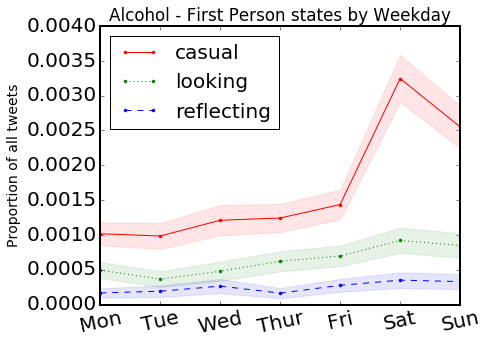

In [42]:
temp = df.groupby([df.index.dayofweek]).agg(
    {
        _:{"mean":"mean", "err":centered_95int} for _ in new_fp_cols
    }
)

print(temp.head())

means = pd.rolling_mean(temp[[1,3,5]], 1)
stds = temp[[0,2,4]]


means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]


fig = plt.figure(figsize=(7,5))

ax = fig.add_subplot(111)
ax.plot(means.casual, "r.-", label="casual")
ax.fill_between(
    x=range(7),
    y1=means.casual - stds.casual,
    y2=means.casual + stds.casual,
    color="r", alpha=.1
)

ax.plot(means.looking, "g.:", label="looking")
ax.fill_between(
    x=range(7),
    y1=means.looking - stds.looking,
    y2=means.looking + stds.looking,
    color="g", alpha=.1
)



ax.plot(means.reflecting, "b.--", label="reflecting")
ax.fill_between(
    x=range(7),
    y1=means.reflecting - stds.reflecting,
    y2=means.reflecting + stds.reflecting,
    
    color="b", alpha=.1
)


ax.set_xticks(range(0, 7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
ax.set_title("Alcohol - First Person states by Weekday")
ax.set_ylabel("Proportion of all tweets")
ax.legend(loc="best")
plt.savefig("plt_levels_week.pdf")

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


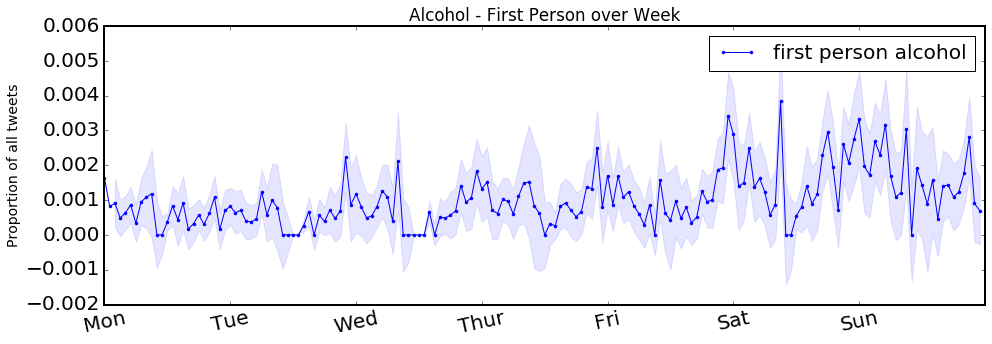

In [43]:

temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
    {
        'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
    }
)

stds = pd.rolling_mean(temp[[0]], 3)
means = temp[[1]] 

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]


fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(range(0, 24*7), means.first_person_alcohol, "b.-", label="first person alcohol")
ax.fill_between(
    x=range(24*7),
    y1=means.first_person_alcohol - stds.first_person_alcohol,
    y2=means.first_person_alcohol + stds.first_person_alcohol,
    color="b", alpha=.1
)


ax.set_xlim([0, 24*7])
ax.set_xticks(range(0, 24*7, 24))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
ax.set_ylabel("Proportion of all tweets")
ax.set_title("Alcohol - First Person over Week")
ax.legend(loc="best")
plt.savefig("plt_fp_weekhour.pdf")

C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


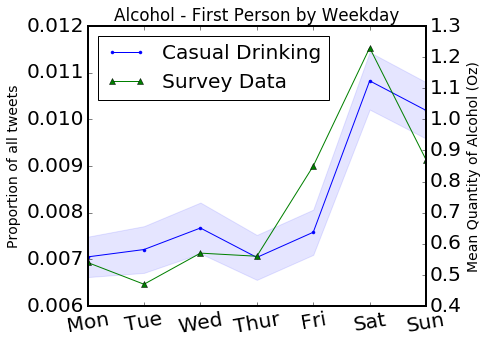

In [138]:
fig = plt.figure(figsize=(7, 5))

ax = fig.add_subplot(111)

cls = 'casual'

temp = df.groupby([df.index.dayofweek]).agg(
    {
        cls : {"mean":"mean", "err":centered_95int}
    }
)

means = temp[[1]]
stds = temp[[0]] 

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]

l1 = ax.plot(means[cls], "b.-", label="Casual Drinking")
ax.fill_between(
    x=range(7),
    y1=means[cls] - stds[cls],
    y2=means[cls] + stds[cls],
    color="b", alpha=.1
)

ax2 = ax.twinx()
l2 = ax2.plot([0.54,0.47,0.57,0.56,0.85,1.23,0.87], 'g^-', label="Survey Data")
ax2.set_ylabel("Mean Quantity of Alcohol (Oz)")
ax.set_xticks(range(0, 7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=10)

ax.set_ylabel("Proportion of all tweets")
ax.set_title("Alcohol - First Person by Weekday")

labs = [l.get_label() for l in l1+l2]
ax.legend(l1+l2, labs, loc=0)

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=2).mean()


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


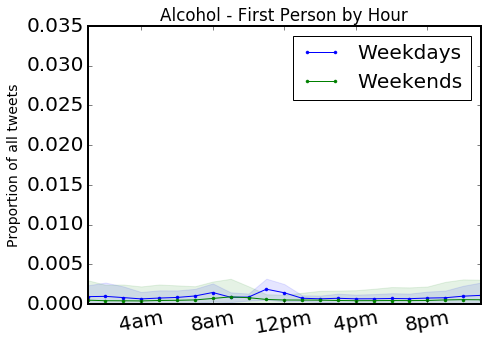

In [121]:

fig = plt.figure(figsize=(7, 5))


weekday = df.index.day < 5

ax = fig.add_subplot(111)

temp = df[weekday].groupby([df[weekday].index.hour]).agg(
    {
        'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
    }
)

stds = pd.rolling_mean(temp[[1]], 2)
means = pd.rolling_mean(temp[[0]], 2)

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]
ax.plot(means.first_person_alcohol, "b.-", label="Weekdays")
ax.fill_between(
    x=range(24),
    y1=means.first_person_alcohol - stds.first_person_alcohol,
    y2=means.first_person_alcohol + stds.first_person_alcohol,
    color="b", alpha=.1
)


temp = df[~weekday].groupby([df[~weekday].index.hour]).agg(
    {
        'first_person_alcohol' : {"mean":"mean", "err":centered_95int}
    }
)

stds = pd.rolling_mean(temp[[1]], 2)
means = pd.rolling_mean(temp[[0]], 2)

means.columns = [col[0] for col in means.columns.values]
stds.columns = [col[0] for col in stds.columns.values]
ax.plot(means.first_person_alcohol, "g.-", label="Weekends")
ax.fill_between(
    x=range(24),
    y1=means.first_person_alcohol - stds.first_person_alcohol,
    y2=means.first_person_alcohol + stds.first_person_alcohol,
    color="g", alpha=.1
)

ax.set_xticks([0, 4, 8, 12, 12+4, 12+8])
ax.set_xticklabels(["12am", "4am", "8am", "12pm", "4pm", "8pm"], rotation=10)
ax.set_xlim([1, 23])
ax.set_ylim([0, .035])
ax.set_ylabel("Proportion of all tweets")
ax.set_title("Alcohol - First Person by Hour")
ax.legend(loc="upper right")
ax.legend(loc="best")